In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
def decBoundary(features,target,h,clf):
    xmin=np.min(features[:,0])
    xmax=np.max(features[:,0])
    ymin=np.min(features[:,1])
    ymax=np.max(features[:,1])
    xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z)
    plt.scatter(features[:,0],features[:,1],c=target,s=20,cmap='autumn')
    plt.show()

In [3]:
data=pd.read_csv('mlfolder/CSV_Files/cvData.csv')

In [4]:
X=np.c_[data["x"],data["y"]]
y=data["t"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.svm import SVC

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
param_grid={'C':[1.0,10.0,50.0],
           'kernel':['linear','rbf'],
           'gamma':['auto',1,0.1]}

In [8]:
model_svc=SVC()

In [9]:
gridsearch=GridSearchCV(model_svc,param_grid,cv=10,scoring='accuracy')

In [10]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 50.0], 'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [11]:
gridsearch.best_score_

np.float64(0.8933333333333333)

In [12]:
gridsearch.best_estimator_.C

50.0

In [13]:
gridsearch.best_estimator_.kernel

'linear'

In [14]:
gridsearch.best_estimator_.gamma

'auto'

In [15]:
pr=gridsearch.predict(X_test)

In [16]:
np.sum(pr==y_test)/len(y_test)

np.float64(0.9)

In [17]:
X_train.shape

(600, 2)

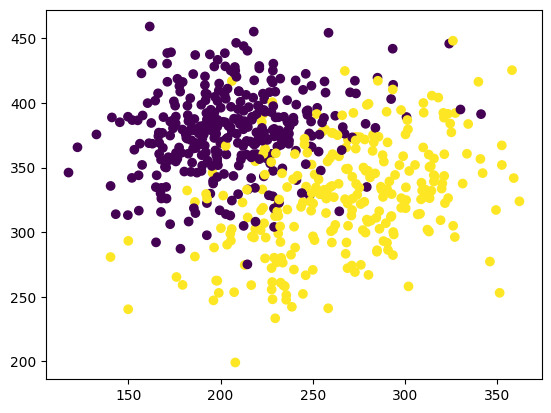

In [18]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)

In [19]:
bestSVC=gridsearch.best_estimator_

In [20]:
bestSVC

SVC(C=50.0, gamma='auto', kernel='linear')

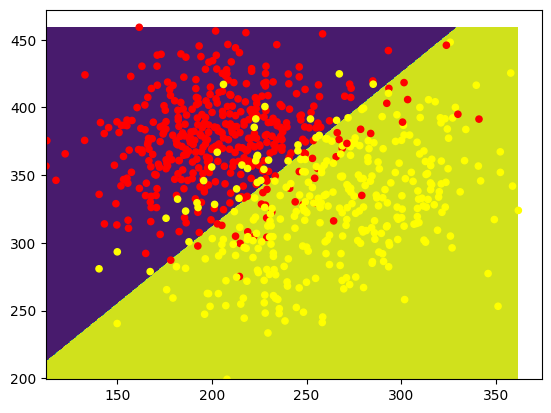

In [21]:
decBoundary(np.c_[data['x'],data['y']],data['t'],0.5,bestSVC)

In [22]:
data

,x,y,t
0,196.639686,392.623867,0
1,189.524100,398.693889,0
2,184.801730,398.852495,0
3,203.105518,360.183792,0
4,171.681678,358.061517,0
...,...,...,...
745,221.692783,289.130319,1
746,218.485170,271.634896,1
747,246.114055,266.707846,1
748,218.081652,295.938314,1


**Example2**

In [23]:
dataset=pd.read_csv("mlfolder/CSV_Files/diabetes.csv")

In [24]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Replacing the missing values(0 in this case) by the median value in that column**

In [25]:
median_bmi=dataset['BMI'].median()
dataset['BMI']=dataset['BMI'].replace(to_replace=0,value=median_bmi)

In [26]:
median_glucose=dataset['Glucose'].median()
dataset['Glucose']=dataset['Glucose'].replace(to_replace=0,value=median_glucose)

In [27]:
median_bp=dataset['BloodPressure'].median()
dataset['BloodPressure']=dataset['BloodPressure'].replace(to_replace=0,value=median_bp)

In [28]:
median_skinthick=dataset['SkinThickness'].median()
dataset['SkinThickness']=dataset['SkinThickness'].replace(to_replace=0,value=median_skinthick)

In [29]:
median_insulin=dataset['Insulin'].median()
dataset['Insulin']=dataset['Insulin'].replace(to_replace=0,value=median_insulin)

In [30]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [31]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.2,random_state=42)

In [32]:
train_set_labels=train_set["Outcome"].copy()

In [33]:
train_set=train_set.drop("Outcome",axis=1)

In [34]:
test_set_labels=test_set["Outcome"].copy()

In [35]:
test_set=test_set.drop("Outcome",axis=1)

In [36]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [37]:
scaler=Scaler()
scaler.fit(train_set)
train_set_scaled=scaler.transform(train_set)
test_set_scaled=scaler.transform(test_set)

In [38]:
type(train_set_scaled)

numpy.ndarray

In [39]:
df=pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn import model_selection

In [42]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('LSVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('DTR',DecisionTreeRegressor()))

In [43]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVC', SVC()),
 ('LSVC', LinearSVC()),
 ('RFC', RandomForestClassifier()),
 ('DTR', DecisionTreeRegressor())]

In [44]:
seed=7
results=[]
names=[]
X=train_set_scaled
Y=train_set_labels

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=42)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.753993 (0.037150)
KNN: 0.736171 (0.035384)
NB: 0.739344 (0.046284)
SVC: 0.758964 (0.018807)
LSVC: 0.762110 (0.042284)
RFC: 0.752327 (0.039820)
DTR: 0.700370 (0.025868)


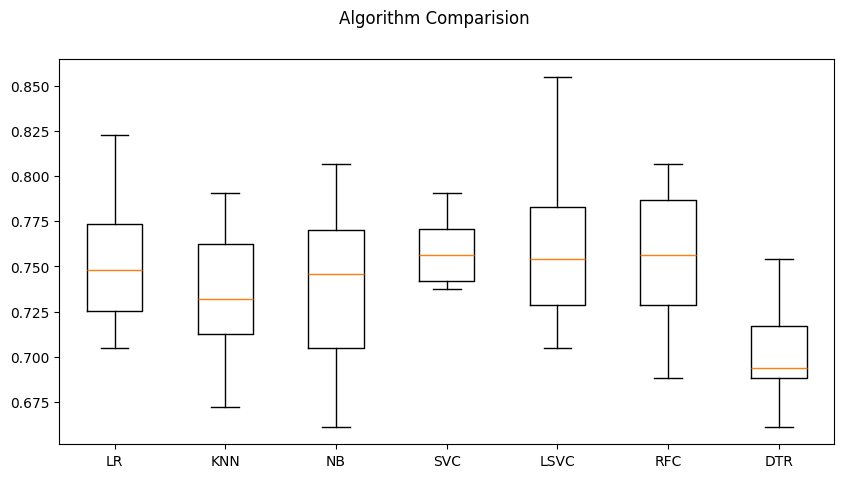

In [45]:
fig,ax=plt.subplots(figsize=(10,5))
fig.suptitle('Algorithm Comparision')
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'C':[1.0,10.0,50.0],
    'kernel':['linear','rbf','poly','sigmoid'],
    'shrinking':[True,False],
    'gamma':['auto',1,0.1],
    'coef0':[0.0,0.1,0.5]
}

model_svc=SVC()
grid_search=GridSearchCV(model_svc,param_grid,cv=10,scoring='accuracy')
grid_search.fit(train_set_scaled,train_set_labels)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 50.0], 'coef0': [0.0, 0.1, 0.5],
                         'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [47]:
grid_search.best_score_

np.float64(0.7686938127974617)

In [48]:
svc=grid_search.best_estimator_

In [49]:
svc

SVC(C=10.0, gamma=0.1)

In [50]:
new_df=pd.DataFrame([[6,168,72,35,0,43.6,0.627,65]])
new_df_scaled=scaler.transform(new_df)

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [51]:
prediction=svc.predict(new_df_scaled)

In [52]:
prediction

array([1])

In [53]:
svc.predict(scaler.transform(pd.DataFrame([[0, 168, 89, 35, 0, 43.6, 0.627, 55]])))

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1])